In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.style.use('ggplot')
pd.get_option("display.max_columns",None)
pd.get_option("display.max_rows", None)
import seaborn as sns

In [ ]:
#run load_clean_app_data.py

In [ ]:
#run load_clean_pre_app_data.py

In [2]:
pre_app = pd.read_csv('pre_app_clean.csv')
app = pd.read_csv('app_clean.csv')

In [3]:
df = pre_app.merge(app, how = 'inner', on = 'id_curr')
df.shape

(1017655, 99)

In [4]:
df['id_curr'].unique().shape

(222733,)

In [5]:
app['id_curr'].unique().shape

(234379,)

In [6]:
a = app['id_curr'].unique().shape[0]
b = df['id_curr'].unique().shape[0]
print(f'Of the {a} credit receivers, {b} also have pre_application information available')
print(f' That is {round(((b/a)*100),2)}%')

Of the 234379 credit receivers, 222733 also have pre_application information available
 That is 95.03%


In [7]:
app = pre_app.merge(app, how = 'inner', on = 'id_curr')

In [8]:
app.columns

Index(['Unnamed: 0_x', 'id_pre', 'id_curr', 'pre_credit_type', 'pre_annuity',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'pre_weekday',
       'pre_hour', 'last_per_contract', 'last_per_day', 'interest',
       'cash_purpose', 'status', 'time_decision', 'payment_name',
       'reject_reason', 'client', 'goods_cat', 'portfolio', 'product_type',
       'channel_type', 'seller', 'cnt_payment', 'pre_app_range',
       'pre_credit_range', 'pre_goods_range', 'Unnamed: 0_y', 'target',
       'credit_type', 'gender', 'fcar', 'frealty', 'kids', 'income', 'credit',
       'annuity', 'goods', 'income_type', 'education', 'family_status',
       'housing', 'pop_relative', 'age', 'employed', 'registration', 'id_pub',
       'fmobile', 'femp_phone', 'fwork_phone', 'freach_phone', 'fphone',
       'femail', 'fam_members', 'region_rating', 'weekday', 'hour',
       'reg_not_live', 'reg_not_work', 'live_not_work', 'regvity_not_livecity',
       'regcity_not_workcity', 'livecity_not_workc

In [9]:
men = app[app['gender'] == 'M']
women = app[app['gender'] == 'F']


In [10]:
target1 = app[app['target'] == 1]
target0 = app[app['target'] == 0]

In [11]:
palette_gender = ['#225ea8','#cb181d']
palette_target = ['#238b45','#e31a1c']

## Type of loan and default rates

Cash loans         92928
Revolving loans     4822
Name: credit_type, dtype: int64
Cash loans         839359
Revolving loans     80546
Name: credit_type, dtype: int64


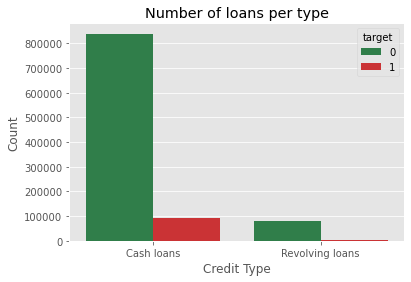

In [12]:
ax = sns.countplot(x = 'credit_type', hue ='target', data = app, palette = palette_target)
ax.set(xlabel = 'Credit Type', ylabel ='Count', title = 'Number of loans per type')

tt = target1['credit_type'].value_counts()
print(tt)

tttt = target0['credit_type'].value_counts()
print(tttt)

### Percentage of defaults per Loan Type

9.97 of Cash loans default, while 5.65 of Revolving loans fall into default


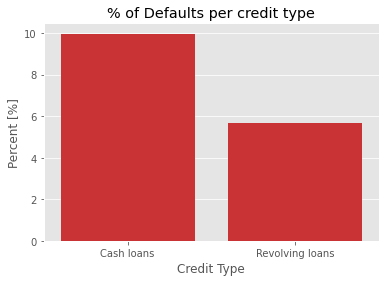

In [13]:
targ1_type = target1['credit_type'].value_counts()
#print(targ1_type)
targ1_total = app['credit_type'].value_counts()
#print(targ1_total) 

targ1_type_perc = (targ1_type/targ1_total)*100
targ1_type_perc = targ1_type_perc.sort_values(ascending = False)

ax = sns.barplot(x = targ1_type_perc.index, y = targ1_type_perc.values, palette = [palette_target[1],palette_target[1]])
ax.set(xlabel = 'Credit Type', ylabel ='Percent [%]', title = '% of Defaults per credit type')

print(f'{round(targ1_type_perc.values[0],2)} of Cash loans default, while {round(targ1_type_perc.values[1],2)} of Revolving loans fall into default')

## Age and default rates

[Text(0.5, 0, 'Age'),
 Text(0, 0.5, 'Count'),
 Text(0.5, 1.0, 'Number of Defaults per age group')]

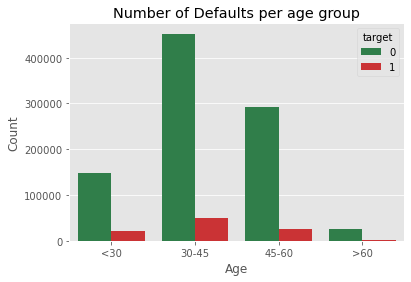

In [14]:
ax = sns.countplot(x = 'age_range', hue = 'target', data = app, \
              order = ['<30','30-45','45-60','>60'],\
              palette = palette_target)

ax.set(xlabel = 'Age', ylabel ='Count', title = 'Number of Defaults per age group')


#### A little hard to see, so plot percentage per age rage that defaults

[Text(0.5, 0, 'Age'),
 Text(0, 0.5, 'Percent [%]'),
 Text(0.5, 1.0, 'Defaults % per total defaults')]

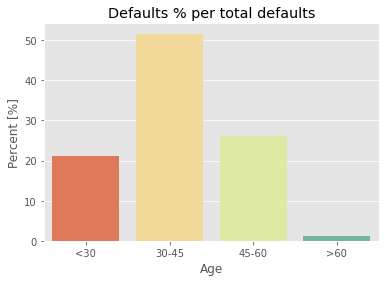

In [15]:
# Percentage of defaults (defaults per age group compared to total defaults)

targ1_age = target1['age_range'].value_counts()
targ1_total = target1.shape[0]
targ1_age_perc = (targ1_age/targ1_total)*100
targ1_age_perc = targ1_age_perc.sort_values(ascending = False)

ax = sns.barplot(x = targ1_age_perc.index, y = targ1_age_perc.values,\
                order = ['<30','30-45','45-60','>60'],\
                 palette = 'Spectral')
ax.set(xlabel = 'Age', ylabel ='Percent [%]', title = 'Defaults % per total defaults')


[Text(0.5, 0, 'Age'),
 Text(0, 0.5, 'Percent [%]'),
 Text(0.5, 1.0, 'Defaults per age group')]

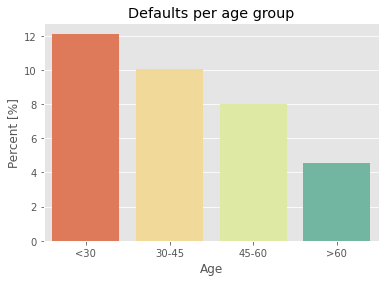

In [16]:
# Number of defaults per age range
targ1_age = target1['age_range'].value_counts()
age_total = app['age_range'].value_counts()
targ1_age_perc = (targ1_age/age_total)*100
targ1_age_perc = targ1_age_perc.sort_values(ascending = False)

ax = sns.barplot(x = targ1_age_perc.index, y = targ1_age_perc.values,\
                order = ['<30','30-45','45-60','>60'],\
                 palette = 'Spectral')

ax.set(xlabel = 'Age', ylabel ='Percent [%]', title = 'Defaults per age group')

## Gender and defaults

[Text(0.5, 0, 'Gender'),
 Text(0, 0.5, 'Count'),
 Text(0.5, 1.0, 'Defaults per gender')]

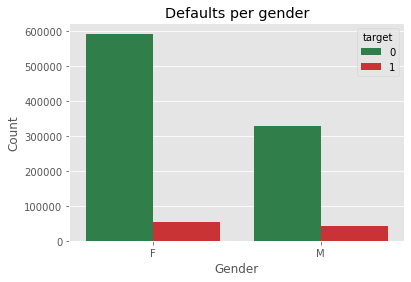

In [17]:
ax = sns.countplot(x = 'gender', hue ='target', data = app, palette = palette_target)
ax.set(xlabel = 'Gender', ylabel ='Count', title = 'Defaults per gender')

## Gender percentage of total defaults 

11.53 of Male customers default, while 8.5 of females fall into default


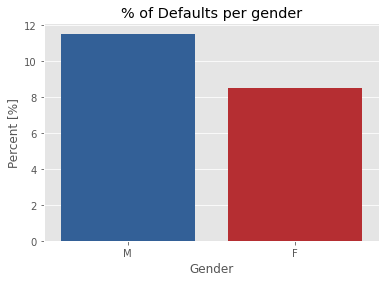

In [18]:
targ1_gen = target1['gender'].value_counts()
targ1_total = app['gender'].value_counts()
 

targ1_gen_perc = (targ1_gen/targ1_total)*100
targ1_gen_perc = targ1_gen_perc.sort_values(ascending = False)

ax = sns.barplot(x = targ1_gen_perc.index, y = targ1_gen_perc.values, palette = palette_gender)
ax.set(xlabel = 'Gender', ylabel ='Percent [%]', \
       title = '% of Defaults per gender')

print(f'{round(targ1_gen_perc.values[0],2)} of Male customers default, while {round(targ1_gen_perc.values[1],2)} of females fall into default')

## By Income 

In [19]:
print(target1['income_range'].value_counts())

upper-middle class    78449
middle class          15299
upper class            3009
lower-middle class      968
Low income               25
Name: income_range, dtype: int64


[Text(0.5, 0, 'Income amount'),
 Text(0, 0.5, ' Count'),
 Text(0.5, 1.0, 'Defaults per income Group')]

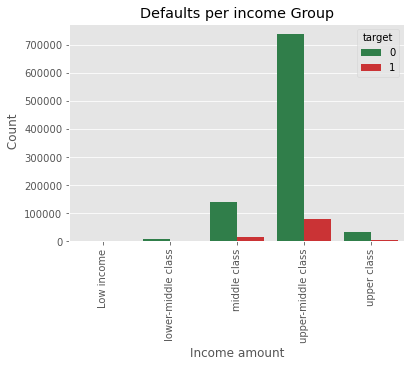

In [20]:
ax = sns.countplot(x = 'income_range', hue = 'target', data = app,\
                       order = ['Low income','lower-middle class','middle class',\
                                'upper-middle class','upper class'],\
                        palette = palette_target)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set(xlabel = 'Income amount', ylabel =' Count', \
       title = 'Defaults per income Group')


[Text(0, 0, 'Low income'),
 Text(1, 0, 'lower-middle class'),
 Text(2, 0, 'middle class'),
 Text(3, 0, 'upper-middle class'),
 Text(4, 0, 'upper class')]

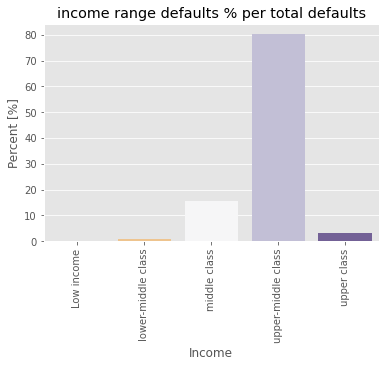

In [21]:
# Percentage of defaults (defaults per income group compared to total defaults)

targ1_in = target1['income_range'].value_counts()
targ1_total = target1.shape[0]
targ1_in_perc = (targ1_in/targ1_total)*100
targ1_in_perc = targ1_in_perc.sort_values(ascending = False)

ax = sns.barplot(x = targ1_in_perc.index, y = targ1_in_perc.values,\
                 order = ['Low income','lower-middle class','middle class',\
                                'upper-middle class','upper class'],\
                 palette = 'PuOr')
ax.set(xlabel = 'Income', ylabel ='Percent [%]', title = 'income range defaults % per total defaults')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

[Text(0, 0, 'Low income'),
 Text(1, 0, 'lower-middle class'),
 Text(2, 0, 'middle class'),
 Text(3, 0, 'upper-middle class'),
 Text(4, 0, 'upper class')]

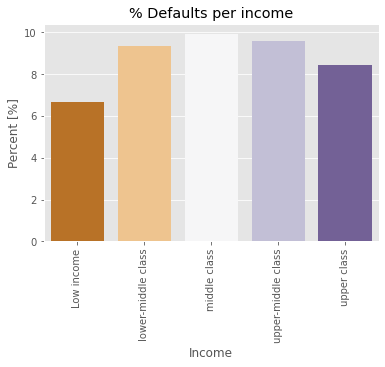

In [22]:

targ1_in = target1['income_range'].value_counts()
targ1_total = app['income_range'].value_counts()
targ1_in_perc = (targ1_in/targ1_total)*100
targ1_in_perc = targ1_in_perc.sort_values(ascending = False)

ax = sns.barplot(x = targ1_in_perc.index, y = targ1_in_perc.values,\
                 order = ['Low income','lower-middle class','middle class',\
                                'upper-middle class','upper class'],\
                 palette = 'PuOr')
ax.set(xlabel = 'Income', ylabel ='Percent [%]', title = '% Defaults per income')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

#print(targ1_in_perc.values.sum())
#print(targ1_total)
#print(targ1_total.sum())
#print(app.shape)

## By loan amount

500000-1000000    37131
300000-500000     24857
200000-300000     17618
>1000000           8775
150000-200000      5106
100000-150000      2955
50000-100000       1210
<50000               98
Name: credit_range, dtype: int64


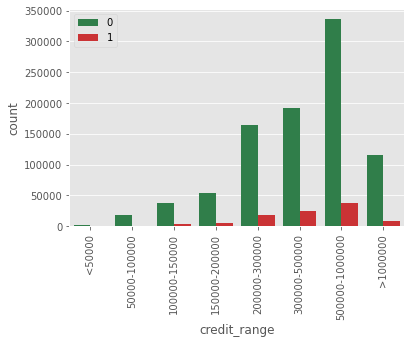

In [26]:
print(target1['credit_range'].value_counts())
ax = sns.countplot(x = 'credit_range', hue = 'target', data = app, \
                   order = ['<50000', '50000-100000','100000-150000',
                            '150000-200000','200000-300000', \
                            '300000-500000', '500000-1000000','>1000000'],\
                  palette = palette_target)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.legend(loc='upper left')

[Text(0, 0, '<50000'),
 Text(1, 0, '50000-100000'),
 Text(2, 0, '100000-150000'),
 Text(3, 0, '150000-200000'),
 Text(4, 0, '200000-300000'),
 Text(5, 0, '300000-500000'),
 Text(6, 0, '500000-1000000'),
 Text(7, 0, '>1000000')]

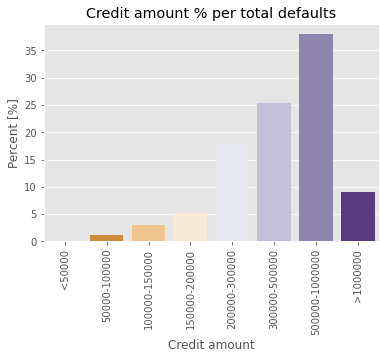

In [27]:
# Percentage of defaults (defaults per credit amount compared to total defaults)

targ1_in = target1['credit_range'].value_counts()
targ1_total = target1.shape[0]
targ1_in_perc = (targ1_in/targ1_total)*100
targ1_in_perc = targ1_in_perc.sort_values(ascending = False)

ax = sns.barplot(x = targ1_in_perc.index, y = targ1_in_perc.values,\
                 order = ['<50000', '50000-100000','100000-150000',
                            '150000-200000','200000-300000', \
                            '300000-500000', '500000-1000000','>1000000'],\
                 palette = 'PuOr')
ax.set(xlabel = 'Credit amount', ylabel ='Percent [%]', title = 'Credit amount % per total defaults')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

[Text(0, 0, '<50000'),
 Text(1, 0, '50000-100000'),
 Text(2, 0, '100000-150000'),
 Text(3, 0, '150000-200000'),
 Text(4, 0, '200000-300000'),
 Text(5, 0, '300000-500000'),
 Text(6, 0, '500000-1000000'),
 Text(7, 0, '>1000000')]

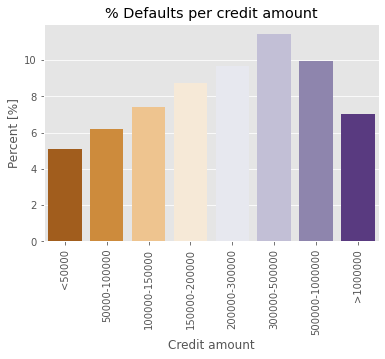

In [28]:
# Percentage of defaults per credit range
targ1_in = target1['credit_range'].value_counts()
targ1_total = app['credit_range'].value_counts()
targ1_in_perc = (targ1_in/targ1_total)*100
targ1_in_perc = targ1_in_perc.sort_values(ascending = False)

ax = sns.barplot(x = targ1_in_perc.index, y = targ1_in_perc.values,\
                 order = ['<50000', '50000-100000','100000-150000',
                            '150000-200000','200000-300000', \
                            '300000-500000', '500000-1000000','>1000000'],\
                 palette = 'PuOr')
ax.set(xlabel = 'Credit amount', ylabel ='Percent [%]', title = '% Defaults per credit amount')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

#print(targ1_in_perc.values.sum())
#print(targ1_total)
#print(targ1_total.sum())
#print(app.shape)

## By education 

Secondary / secondary special    77865
Higher education                 14952
Incomplete higher                 3583
Lower secondary                   1343
Academic degree                      7
Name: education, dtype: int64


[Text(0, 0, 'Lower secondary'),
 Text(1, 0, 'Secondary/secondary special'),
 Text(2, 0, 'Incomplete higher'),
 Text(3, 0, 'Higher education'),
 Text(4, 0, 'academic degree')]

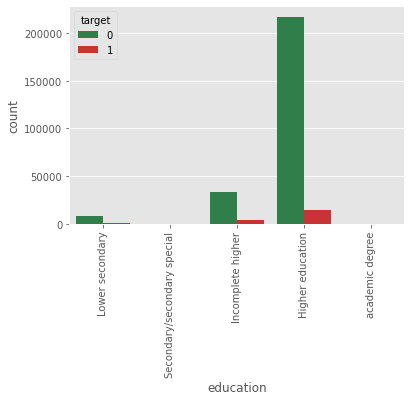

In [29]:
print(target1['education'].value_counts())
ax = sns.countplot(x = 'education', hue = 'target', data = app,\
                  order = ['Lower secondary','Secondary/secondary special','Incomplete higher',
                          'Higher education','academic degree'],
                  palette = palette_target)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

[Text(0, 0, 'Lower secondary'),
 Text(1, 0, 'Secondary/secondary special'),
 Text(2, 0, 'Incomplete higher'),
 Text(3, 0, 'Higher education'),
 Text(4, 0, 'academic degree')]

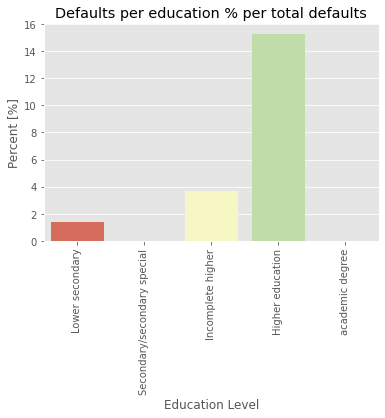

In [30]:
# Percentage of defaults (defaults per credit amount compared to total defaults)
targ1_in = target1['education'].value_counts()
targ1_total = target1.shape[0]
targ1_in_perc = (targ1_in/targ1_total)*100
targ1_in_perc = targ1_in_perc.sort_values(ascending = False)

ax = sns.barplot(x = targ1_in_perc.index, y = targ1_in_perc.values,\
                 order = ['Lower secondary','Secondary/secondary special',\
                          'Incomplete higher','Higher education','academic degree'],\
                 palette = 'Spectral')
ax.set(xlabel = 'Education Level', ylabel ='Percent [%]', title = 'Defaults per education % per total defaults')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

[Text(0, 0, 'Lower secondary'),
 Text(1, 0, 'Secondary/secondary special'),
 Text(2, 0, 'Incomplete higher'),
 Text(3, 0, 'Higher education'),
 Text(4, 0, 'academic degree')]

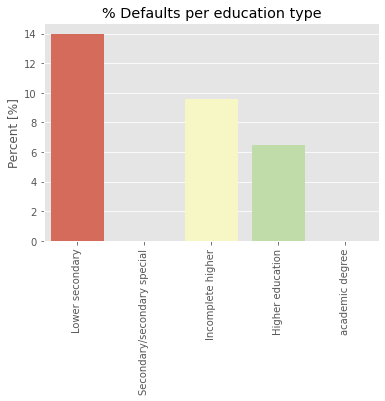

In [36]:
# Percentage of defaults per credit range
targ1_in = target1['education'].value_counts()
targ1_total = app['education'].value_counts()
targ1_in_perc = (targ1_in/targ1_total)*100
targ1_in_perc = targ1_in_perc.sort_values(ascending = False)

ax = sns.barplot(x = targ1_in_perc.index, y = targ1_in_perc.values,\
                 order = ['Lower secondary','Secondary/secondary special',\
                          'Incomplete higher','Higher education','academic degree'],\
                 palette = 'Spectral')
ax.set(xlabel = '', ylabel ='Percent [%]', title = '% Defaults per education type')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


# Default of credit and previous credit status? 

In [32]:
app.columns

Index(['Unnamed: 0_x', 'id_pre', 'id_curr', 'pre_credit_type', 'pre_annuity',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'pre_weekday',
       'pre_hour', 'last_per_contract', 'last_per_day', 'interest',
       'cash_purpose', 'status', 'time_decision', 'payment_name',
       'reject_reason', 'client', 'goods_cat', 'portfolio', 'product_type',
       'channel_type', 'seller', 'cnt_payment', 'pre_app_range',
       'pre_credit_range', 'pre_goods_range', 'Unnamed: 0_y', 'target',
       'credit_type', 'gender', 'fcar', 'frealty', 'kids', 'income', 'credit',
       'annuity', 'goods', 'income_type', 'education', 'family_status',
       'housing', 'pop_relative', 'age', 'employed', 'registration', 'id_pub',
       'fmobile', 'femp_phone', 'fwork_phone', 'freach_phone', 'fphone',
       'femail', 'fam_members', 'region_rating', 'weekday', 'hour',
       'reg_not_live', 'reg_not_work', 'live_not_work', 'regvity_not_livecity',
       'regcity_not_workcity', 'livecity_not_workc

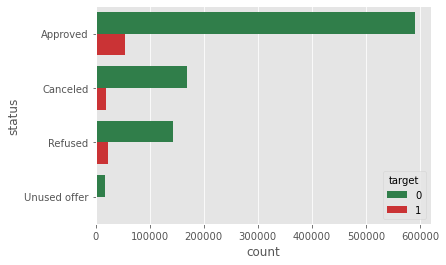

In [45]:
ax = sns.countplot(y = 'status', hue = 'target', data = app,\
                  order = ['Approved', 'Canceled','Refused','Unused offer'],\
#                          'Higher education','academic degree'],
                  palette = palette_target)
#ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

[Text(0, 0.5, 'Prev. Credit Status'),
 Text(0.5, 0, 'Percent [%]'),
 Text(0.5, 1.0, 'Defaults per prev credit status')]

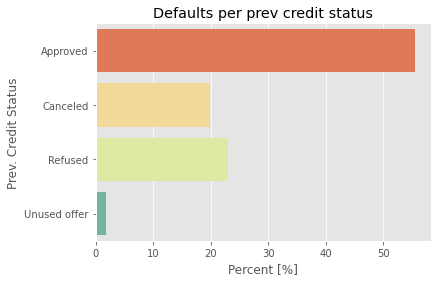

In [46]:
targ1_in = target1['status'].value_counts()
targ1_total = target1.shape[0]
targ1_in_perc = (targ1_in/targ1_total)*100
targ1_in_perc = targ1_in_perc.sort_values(ascending = False)

ax = sns.barplot(y = targ1_in_perc.index, x = targ1_in_perc.values,\
                 order = ['Approved', 'Canceled','Refused','Unused offer'],\
                 palette = 'Spectral')
ax.set(ylabel = 'Prev. Credit Status', xlabel ='Percent [%]', title = 'Defaults per prev credit status')
#ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

[Text(0, 0.5, 'Prev Credit Status'),
 Text(0.5, 0, 'Percent [%]'),
 Text(0.5, 1.0, '% Defaults per prev. credit status')]

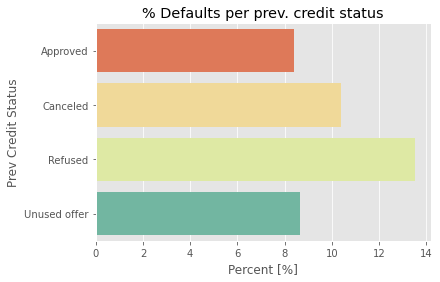

In [47]:
targ1_in = target1['status'].value_counts()
targ1_total = app['status'].value_counts()
targ1_in_perc = (targ1_in/targ1_total)*100
targ1_in_perc = targ1_in_perc.sort_values(ascending = False)

ax = sns.barplot(y = targ1_in_perc.index, x = targ1_in_perc.values,\
                 order = ['Approved', 'Canceled','Refused','Unused offer'],\
                 palette = 'Spectral')
ax.set(ylabel = 'Prev Credit Status', xlabel ='Percent [%]', title = '% Defaults per prev. credit status')
#ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


# Living area

[Text(0, 0.5, 'Living area'),
 Text(0.5, 0, 'COUNT'),
 Text(0.5, 1.0, 'Living area of clients that default')]

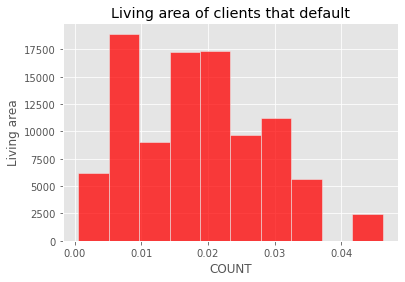

In [74]:
fig, ax = plt.subplots()

ax = sns.histplot(target1['pop_relative'], bins = 10, color = 'red')
ax.set(ylabel = 'Living area', xlabel ='COUNT', title = 'Living area of clients that default')


# Combine several factors

In [53]:
print(target1['age_range'].value_counts())
print(app['age_range'].value_counts())
#targ1_age_perc = (targ1_age/age_total)*100

50453/502824


30-45    50453
45-60    25483
<30      20571
>60       1243
Name: age_range, dtype: int64
30-45    502824
45-60    317944
<30      169723
>60       27164
Name: age_range, dtype: int64


0.10033928372551827

* We know that the age group 30-45 years makes up 50% of all defaults.
* And we know that men are more likely to default than women.
--> combine age and gender.

[Text(0, 0, 'Lower secondary'),
 Text(1, 0, 'Secondary/secondary special'),
 Text(2, 0, 'Incomplete higher'),
 Text(3, 0, 'Higher education'),
 Text(4, 0, 'academic degree')]

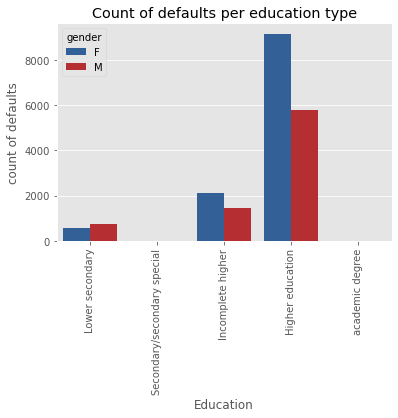

In [54]:
ax = sns.countplot(x = 'education', hue = 'gender', data = target1,\
                  order = ['Lower secondary','Secondary/secondary special','Incomplete higher',
                          'Higher education','academic degree'],
                   palette = ['#225ea8','#cb181d'])

ax.set(xlabel = 'Education', ylabel = 'count of defaults', title = 'Count of defaults per education type')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


[Text(0, 0, 'Lower secondary'),
 Text(1, 0, 'Secondary/secondary special'),
 Text(2, 0, 'Incomplete higher'),
 Text(3, 0, 'Higher education'),
 Text(4, 0, 'academic degree')]

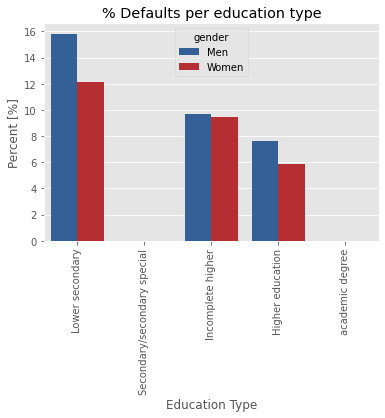

In [56]:
men_ed = men.groupby('education')['target'].agg('sum')
men_ed_total = men['education'].value_counts()
men_per = round((men_ed/men_ed_total)*100,2)


men_per = men_per.reset_index()
men_per.columns = ['Education','Percent']
men_per['gender'] = 'Men'


women_ed = women.groupby('education')['target'].agg('sum')
women_ed_total = women['education'].value_counts()
women_per = round((women_ed/women_ed_total)*100,2)

women_per = women_per.reset_index()
women_per.columns = ['Education','Percent']
women_per['gender'] = 'Women'

df = men_per.append(women_per)
df


ax = sns.barplot(x = 'Education', y = 'Percent', hue = 'gender', data = df,\
                order = ['Lower secondary','Secondary/secondary special',\
                          'Incomplete higher','Higher education','academic degree'],\
                 palette = palette_gender)
ax.set(xlabel = 'Education Type', ylabel ='Percent [%]', title = '% Defaults per education type')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


So both, men AND women are more likely to default if their education is Lower Secondary. 

* We also know that age groups of 35 - 40 are more likely to default. 
    --> Put age together with gender, to see if that is true for both genders. 

[Text(0, 0, '<30'),
 Text(1, 0, '30-45'),
 Text(2, 0, '45-60'),
 Text(3, 0, '>60')]

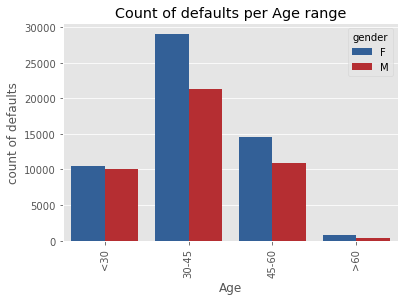

In [57]:
ax = sns.countplot(x = 'age_range', hue = 'gender', data = target1,\
                   order = ['<30','30-45','45-60','>60'],\
                   palette = palette_gender)


ax.set(xlabel = 'Age', ylabel = 'count of defaults', title = 'Count of defaults per Age range')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


[Text(0, 0, '<30'),
 Text(1, 0, '30-45'),
 Text(2, 0, '45-60'),
 Text(3, 0, '>60')]

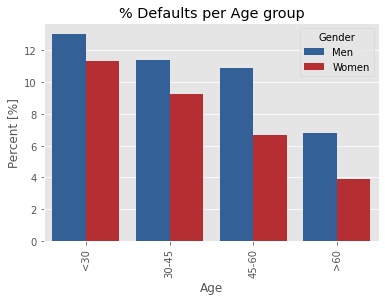

In [59]:
men_age = men.groupby('age_range')['target'].agg('sum')
men_age_total = men['age_range'].value_counts()
men_per = round((men_age/men_age_total)*100,2)


men_per = men_per.reset_index()
men_per.columns = ['Age','Percent']
men_per['Gender'] = 'Men'


women_age = women.groupby('age_range')['target'].agg('sum')
women_age_total = women['age_range'].value_counts()
women_per = round((women_age/women_age_total)*100,2)

women_per = women_per.reset_index()
women_per.columns = ['Age','Percent']
women_per['Gender'] = 'Women'

df = men_per.append(women_per)
df


ax = sns.barplot(x = 'Age', y = 'Percent', hue = 'Gender', data = df,\
                order = ['<30','30-45','45-60','>60'],\
                 palette = palette_gender)
ax.set(xlabel = 'Age', ylabel ='Percent [%]', title = '% Defaults per Age group')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


[Text(0, 0, 'Approved'),
 Text(1, 0, 'Canceled'),
 Text(2, 0, 'Refused'),
 Text(3, 0, 'Unused offer')]

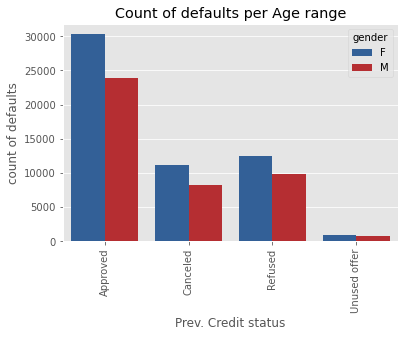

In [60]:
ax = sns.countplot(x = 'status', hue = 'gender', data = target1,\
                   order = ['Approved', 'Canceled','Refused','Unused offer'],\
                   palette = palette_gender)


ax.set(xlabel = 'Prev. Credit status', ylabel = 'count of defaults', title = 'Count of defaults per Age range')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


[Text(0, 0.5, 'Status prev. credit'),
 Text(0.5, 0, 'Percent [%]'),
 Text(0.5, 1.0, '% Defaults per prev. credit status')]

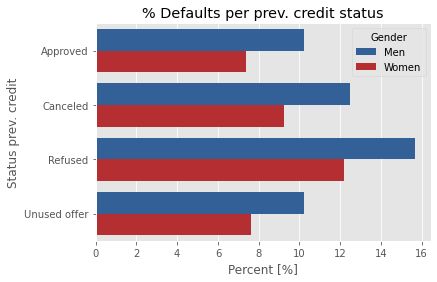

In [63]:
men_age = men.groupby('status')['target'].agg('sum')
men_age_total = men['status'].value_counts()
men_per = round((men_age/men_age_total)*100,2)


men_per = men_per.reset_index()
men_per.columns = ['Status','Percent']
men_per['Gender'] = 'Men'


women_age = women.groupby('status')['target'].agg('sum')
women_age_total = women['status'].value_counts()
women_per = round((women_age/women_age_total)*100,2)

women_per = women_per.reset_index()
women_per.columns = ['Status','Percent']
women_per['Gender'] = 'Women'

df = men_per.append(women_per)


ax = sns.barplot(y = 'Status', x = 'Percent', hue = 'Gender', data = df,\
                 order = ['Approved', 'Canceled','Refused','Unused offer'],\
                 palette = palette_gender)
ax.set(ylabel = 'Status prev. credit', xlabel ='Percent [%]', title = '% Defaults per prev. credit status')


## Region in which client lives

[Text(0, 0.5, 'Living area'),
 Text(0.5, 0, 'COUNT'),
 Text(0.5, 1.0, 'Living area of clients that default')]

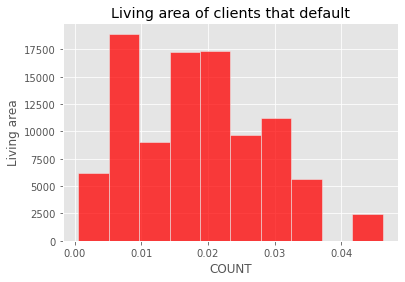

In [73]:
fig, ax = plt.subplots()

ax = sns.histplot(target1['pop_relative'], bins = 10, color = 'red')
ax.set(ylabel = 'Living area', xlabel ='COUNT', title = 'Living area of clients that default')


In [75]:
target1['pop_relative'].mean()

0.018499693401530917

In [76]:
target0['pop_relative'].mean()

0.019508974195181526

# Relationship between age, Education, gender?

<AxesSubplot:xlabel='education', ylabel='credit'>

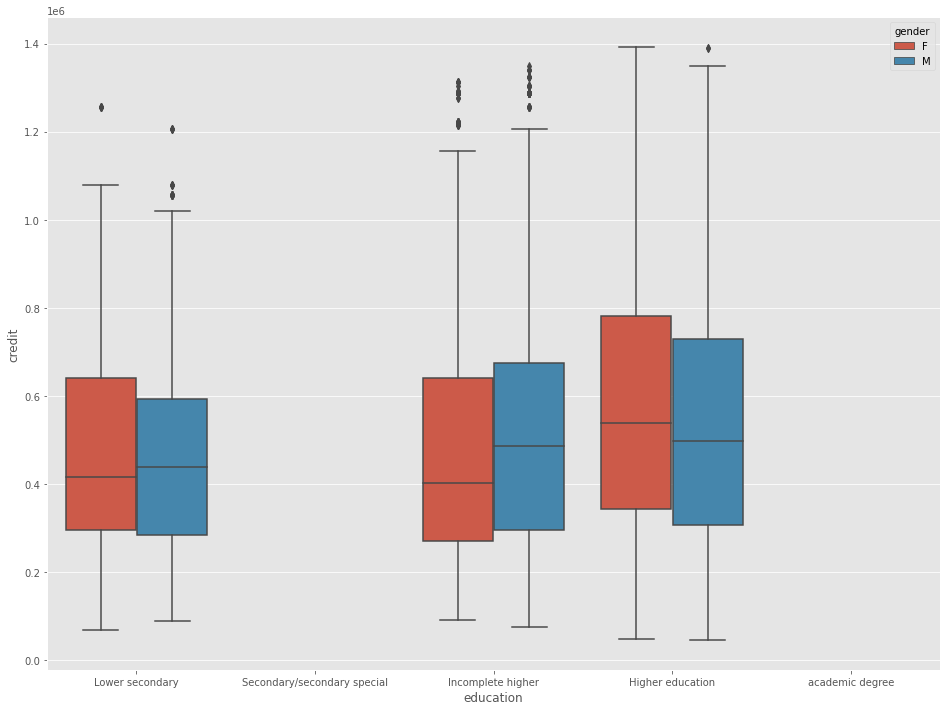

In [96]:
plt.figure(figsize = (16,12))

sns.boxplot(data = target1, x = 'education', y = 'credit', hue = 'gender',\
           order = ['Lower secondary','Secondary/secondary special',\
                          'Incomplete higher','Higher education','academic degree'])

<AxesSubplot:xlabel='education', ylabel='credit'>

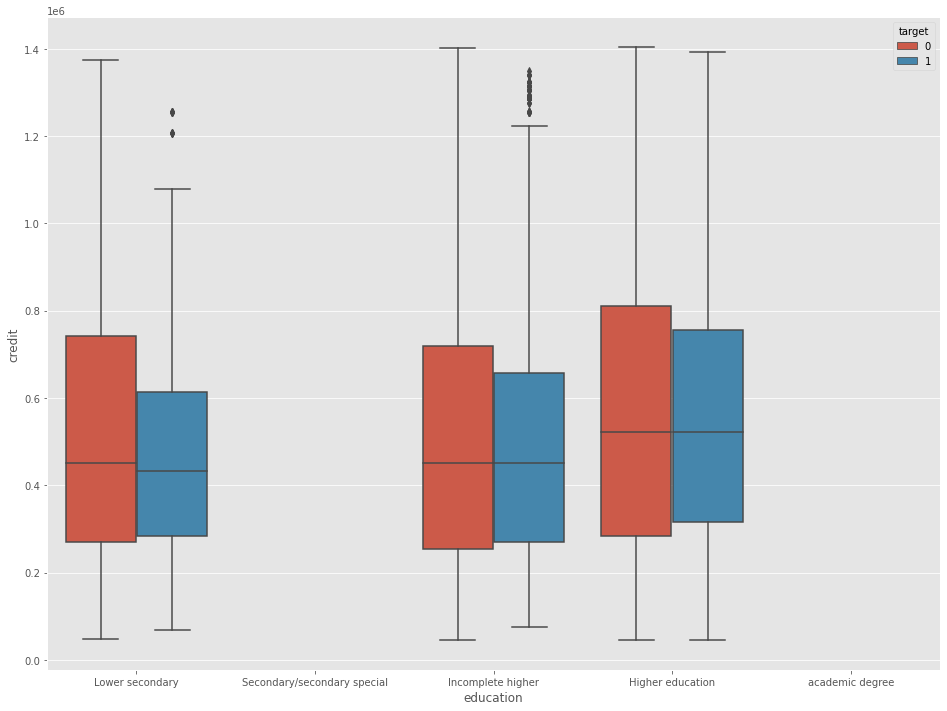

In [118]:
plt.figure(figsize = (16,12))

sns.boxplot(data = app, x = 'education', y = 'credit', hue = 'target',\
           order = ['Lower secondary','Secondary/secondary special',\
                          'Incomplete higher','Higher education','academic degree'])

<AxesSubplot:xlabel='age_range', ylabel='credit'>

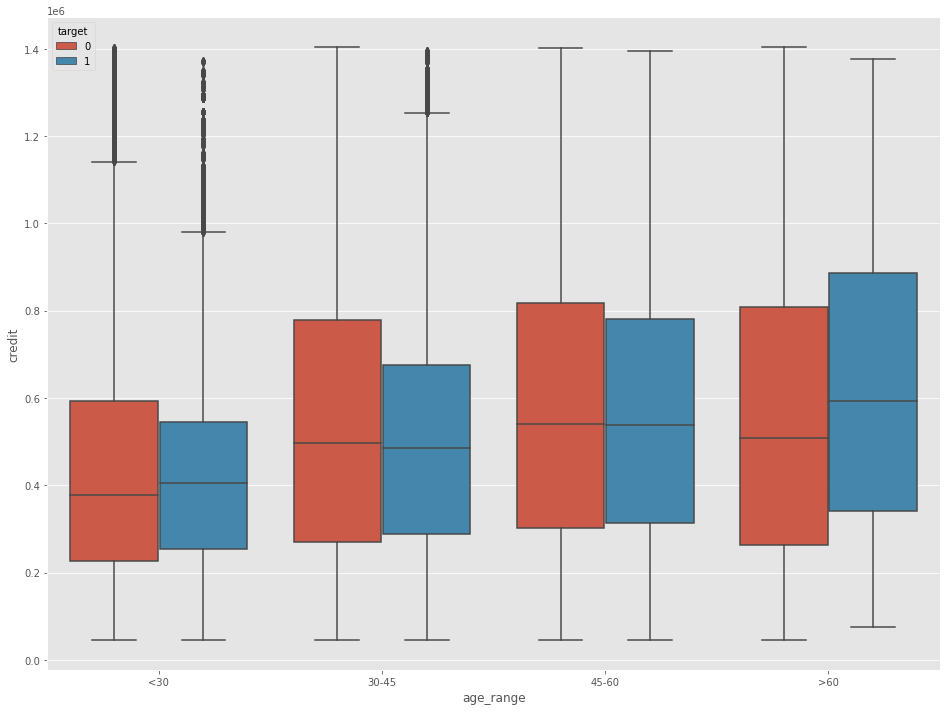

In [129]:
plt.figure(figsize = (16,12))

sns.boxplot(data = app, x = 'age_range', y = 'credit', hue = 'target',\
            order = ['<30','30-45','45-60','>60'])



<AxesSubplot:xlabel='income_range', ylabel='credit'>

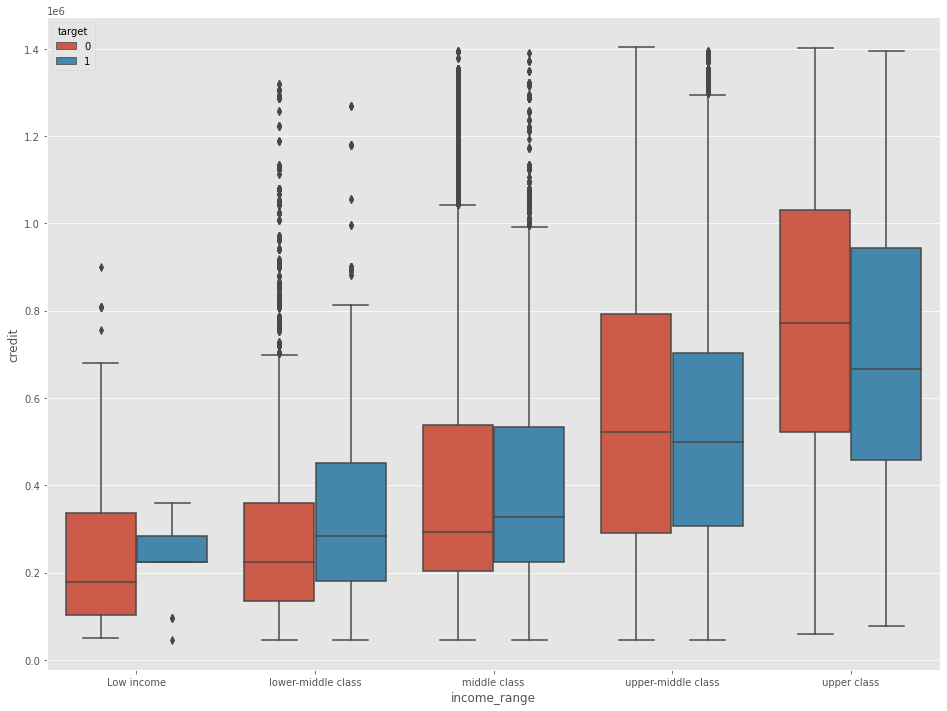

In [132]:
plt.figure(figsize = (16,12))

sns.boxplot(data = app, x = 'income_range', y = 'credit', hue = 'target',\
            order = ['Low income','lower-middle class','middle class',\
                     'upper-middle class','upper class'])





<AxesSubplot:xlabel='status', ylabel='credit'>

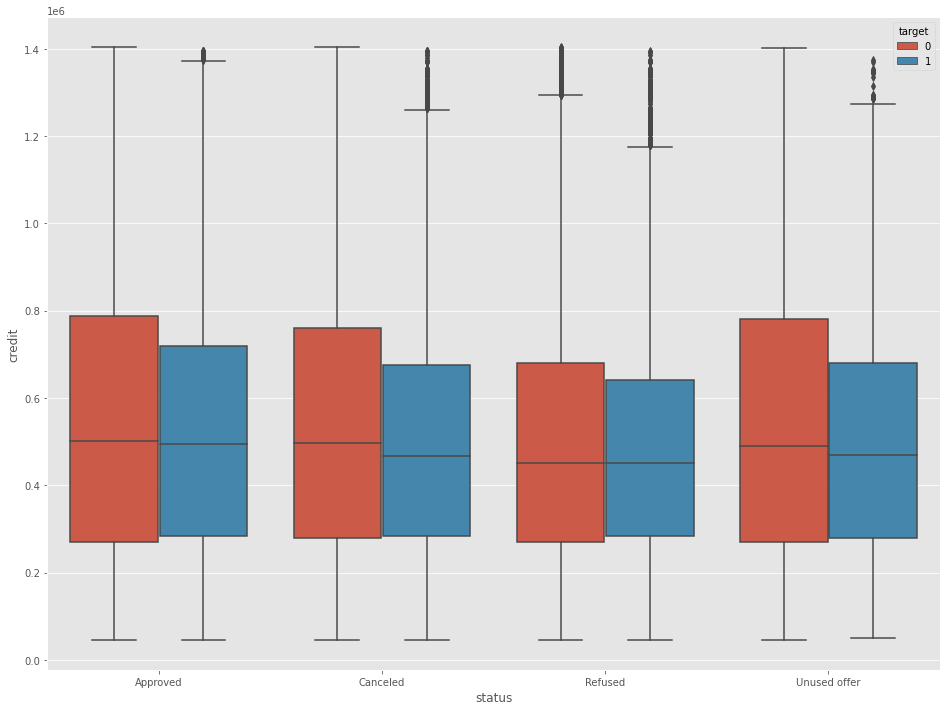

In [133]:
plt.figure(figsize = (16,12))

sns.boxplot(data = app, x = 'status', y = 'credit', hue = 'target',\
            order = ['Approved', 'Canceled','Refused','Unused offer'])


<AxesSubplot:xlabel='gender', ylabel='credit'>

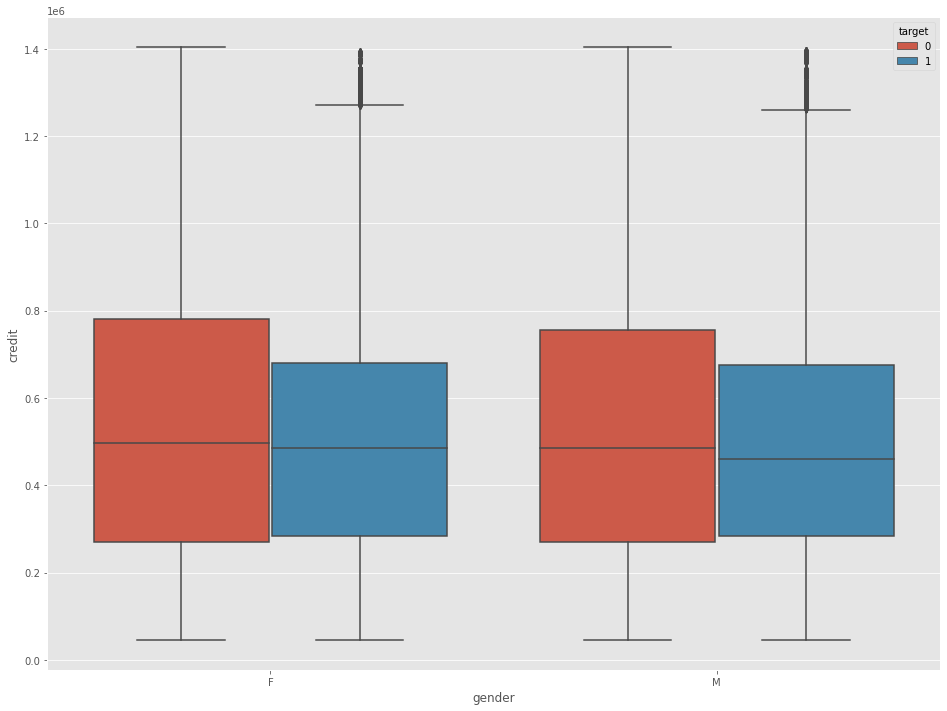

In [134]:
plt.figure(figsize = (16,12))

sns.boxplot(data = app, x = 'gender', y = 'credit', hue = 'target')


<AxesSubplot:xlabel='income_range', ylabel='pop_relative'>

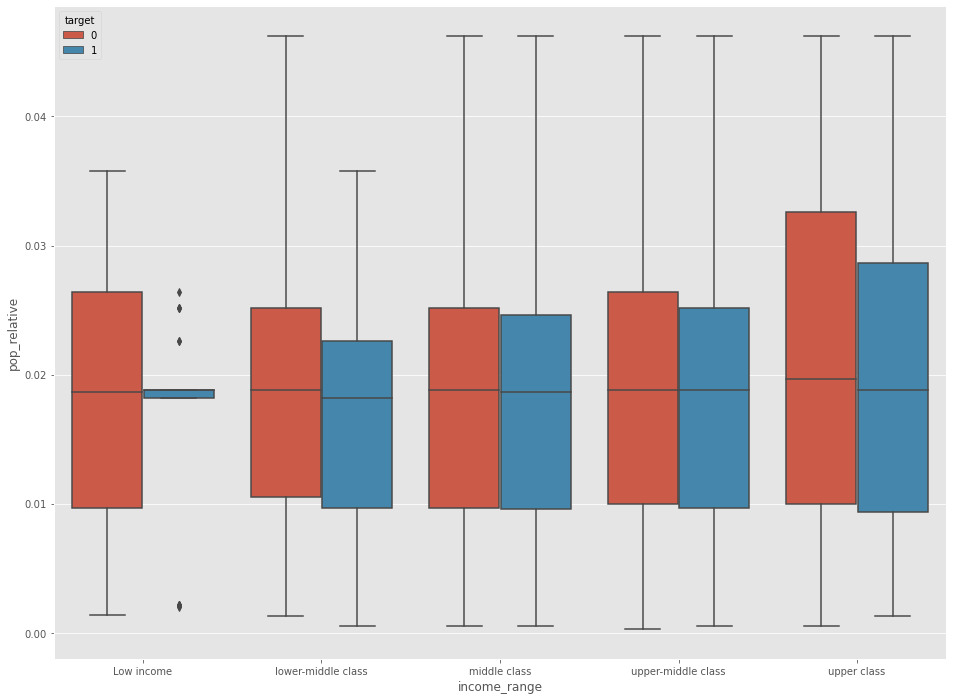

In [135]:
plt.figure(figsize = (16,12))

sns.boxplot(data = app, x = 'income_range', y = 'pop_relative', hue = 'target',\
            order = ['Low income','lower-middle class','middle class',\
                     'upper-middle class','upper class'])



<AxesSubplot:xlabel='age_range', ylabel='pop_relative'>

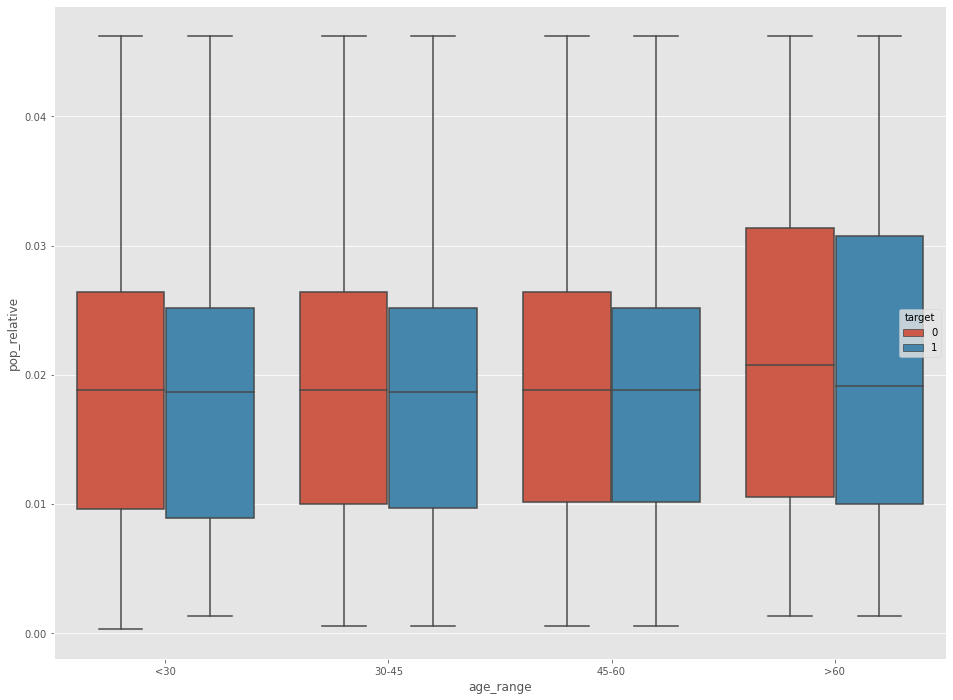

In [142]:
plt.figure(figsize = (16,12))

sns.boxplot(data = app, x = 'age_range', y = 'pop_relative', hue = 'target',\
            order = ['<30','30-45','45-60','>60'])



# HEATMAP

In [143]:
# Turn age ranges into values
app['age_range'].value_counts()


30-45    502824
45-60    317944
<30      169723
>60       27164
Name: age_range, dtype: int64

In [144]:
app['education'].value_counts()


Secondary / secondary special    738183
Higher education                 232110
Incomplete higher                 37360
Lower secondary                    9600
Academic degree                     402
Name: education, dtype: int64

In [148]:
app['income_range'].value_counts()


upper-middle class    816917
middle class          154295
upper class            35690
lower-middle class     10378
Low income               375
Name: income_range, dtype: int64

In [149]:
app['credit_range'].value_counts()


500000-1000000    373299
300000-500000     217550
200000-300000     182197
>1000000          124650
150000-200000      58539
100000-150000      39981
50000-100000       19513
<50000              1926
Name: credit_range, dtype: int64

In [163]:
app['status'].value_counts()


Approved        644183
Canceled        187847
Refused         165908
Unused offer     19717
Name: status, dtype: int64

In [185]:
app['goods_range'].value_counts()

500000-1000000    311232
300000-500000     283180
200000-300000     210695
>1000000           69876
150000-200000      56527
100000-150000      53338
50000-100000       26995
<50000              4788
Name: goods_range, dtype: int64

In [253]:
app['family_status'].value_counts()

Married                 662627
Single / not married    145692
Civil marriage          113097
Separated                65384
Widow                    30855
Name: family_status, dtype: int64

In [254]:
app['housing'].value_counts()

House / apartment      896070
With parents            56909
Municipal apartment     34631
Rented apartment        17778
Office apartment         8725
Co-op apartment          3542
Name: housing, dtype: int64

In [255]:
app['weekday'].value_counts()

TUESDAY      178602
MONDAY       169290
WEDNESDAY    168256
THURSDAY     164485
FRIDAY       163860
SATURDAY     115657
SUNDAY        57505
Name: weekday, dtype: int64

In [262]:
cleanup_nums = {"age_range": {"<30":1, "30-45": 2, "45-60": 3, ">60":4},
               "education": {"Lower secondary": 1, "Incomplete higher": 2, "Secondary / secondary special": 3, \
                            "Incomplete higher": 4, "Higher education": 5, "Academic degree": 6},
               "income_range": {"Low income": 1, "lower-middle class": 2, "middle class": 3, "upper-middle class": 4,\
                               "upper class": 5},
               "credit_range": {"<50000": 1, "50000-100000": 2, "100000-150000": 3, "150000-200000": 4,\
                "200000-300000": 5, "300000-500000":6, "500000-1000000":7, ">1000000":8},
               "status":{"Approved":1 , "Canceled": 2, "Refused": 3, "Unused offer": 4},
               "gender": {'M':1, 'F': 2},
               "goods_range": {"<50000": 1, "50000-100000": 2, "100000-150000": 3, "150000-200000": 4,\
                "200000-300000": 5, "300000-500000":6, "500000-1000000":7, ">1000000":8},
               "family_status": {"Married":1, "Single / not married":2, "Civil marriage": 3, \
                                 "Separated": 4, "Widow": 5},
               "housing": {"House / apartment":1, "With parents":2, "Municipal apartment":3, \
                           "Rented apartment":4, "Office apartment":5, "Co-op apartment":6,},
               'weekday': {"MONDAY":1, "TUESDAY":2, "WEDNESDAY":3, "THURSDAY":4, "FRIDAY":5, "SATURDAY":6, "SUNDAY":7}}

In [263]:
num_app = app.replace(cleanup_nums)
num_app = num_app[['target','age_range','education','income_range','credit_range','status','pop_relative','gender',\
                  'fcar','frealty','femp_phone','fphone','femail','region_rating',\
                   'regcity_not_workcity', 'livecity_not_workcity', 'family_status','housing','weekday','hour']]
num_app.head(10)

,target,age_range,education,income_range,credit_range,status,pop_relative,gender,fcar,frealty,femp_phone,fphone,femail,region_rating,regcity_not_workcity,livecity_not_workcity,family_status,housing,weekday,hour
0,0,2,4,4,7,1,0.046220,2,N,Y,1,1,0,1,0,0,1,1,2,17
1,0,2,4,4,7,1,0.046220,2,N,Y,1,1,0,1,0,0,1,1,2,17
2,0,3,3,3,3,1,0.025164,2,N,N,1,0,0,2,0,0,3,1,7,10
3,0,3,3,3,3,1,0.025164,2,N,N,1,0,0,2,0,0,3,1,7,10
4,0,3,3,3,3,1,0.025164,2,N,N,1,0,0,2,0,0,3,1,7,10
5,0,3,3,3,3,1,0.025164,2,N,N,1,0,0,2,0,0,3,1,7,10
6,0,3,3,3,3,1,0.025164,2,N,N,1,0,0,2,0,0,3,1,7,10
7,0,3,3,3,3,1,0.025164,2,N,N,1,0,0,2,0,0,3,1,7,10
8,0,1,3,2,5,1,0.025164,2,N,Y,1,0,0,2,0,0,1,1,2,9
9,0,1,3,2,5,1,0.025164,2,N,Y,1,0,0,2,0,0,1,1,2,9


In [338]:
from matplotlib.colors import LinearSegmentedColormap


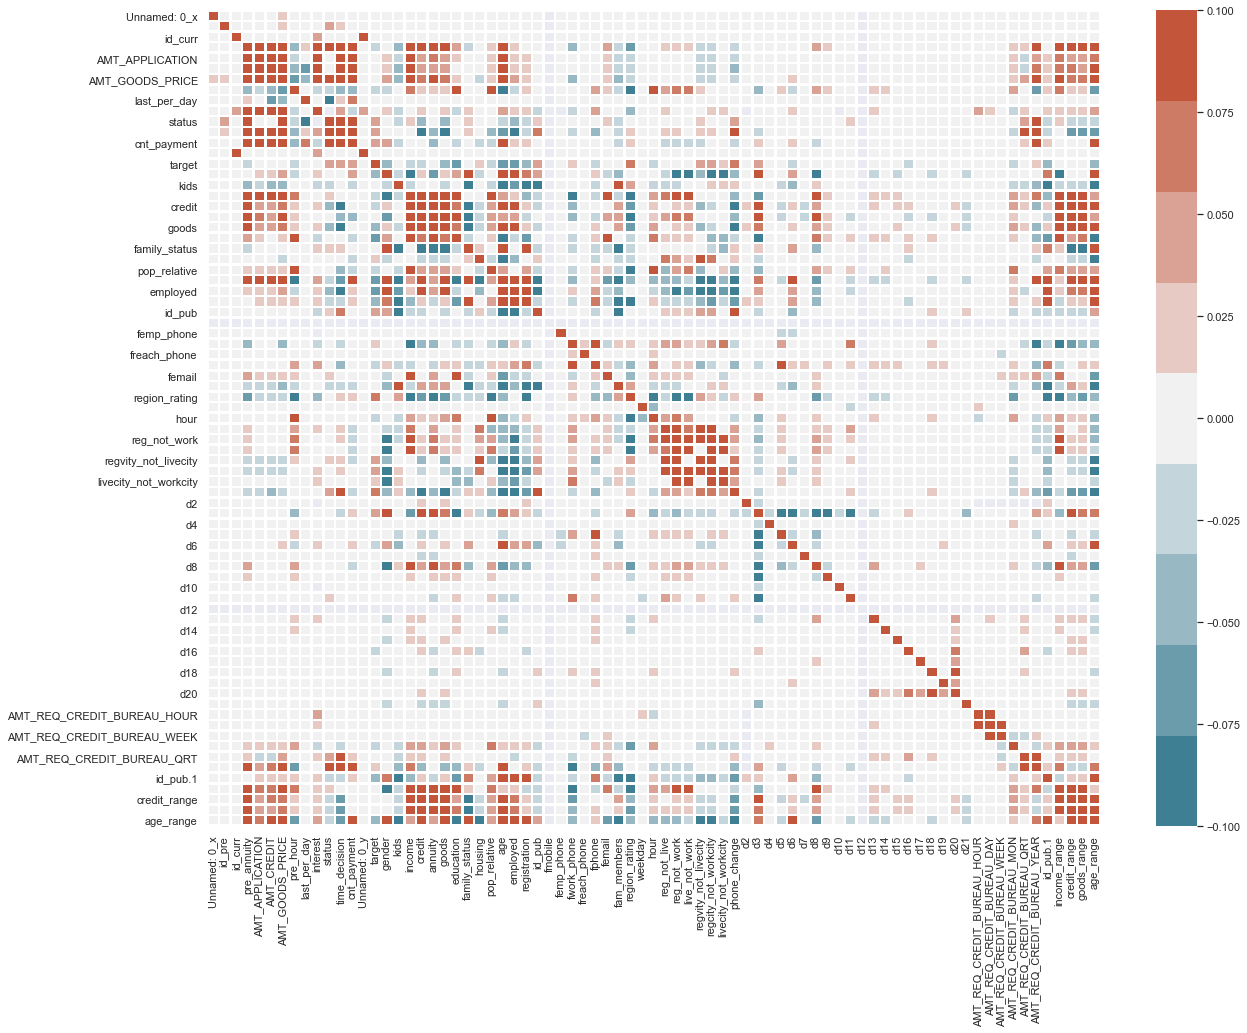

In [335]:
sns.set(font_scale=1)


num_app = app.replace(cleanup_nums)
#num_app = num_app[['target','age_range','education','income_range','credit_range','status','pop_relative','gender',\
#                  'fcar','frealty','femp_phone','fphone','femail','region_rating',\
#                   'regcity_not_workcity', 'livecity_not_workcity', 'family_status','housing','weekday','hour']]
num_app.head(10)


corr = num_app.corr()
#corr = corr[['target']]
#corr = corr.iloc[1:-1]

corr = round(corr,3)

plt.figure(figsize = (20,15))

ccm = sns.diverging_palette(220, 20, n=9)
 
#yticklabels = ['Age,','Education','Income','Credit','Prev. Credit Status','Living Situation',\
#              'Gender','Empl. Phone','Phone','Email','Remote or Urban','Permantent add. not at work',\
#              'Contact add. not work','Family Status','Weekday','Hour']

ax = sns.heatmap(corr, linecolor = 'white', linewidth = 1.5,\
                 vmax = 0.1, vmin = -0.1, annot = False,\
                cmap = ccm)#, xticklabels=False)#, yticklabels = yticklabels)

#plt.xlabel("Target") 

Text(0.5, 131.0, 'Target')

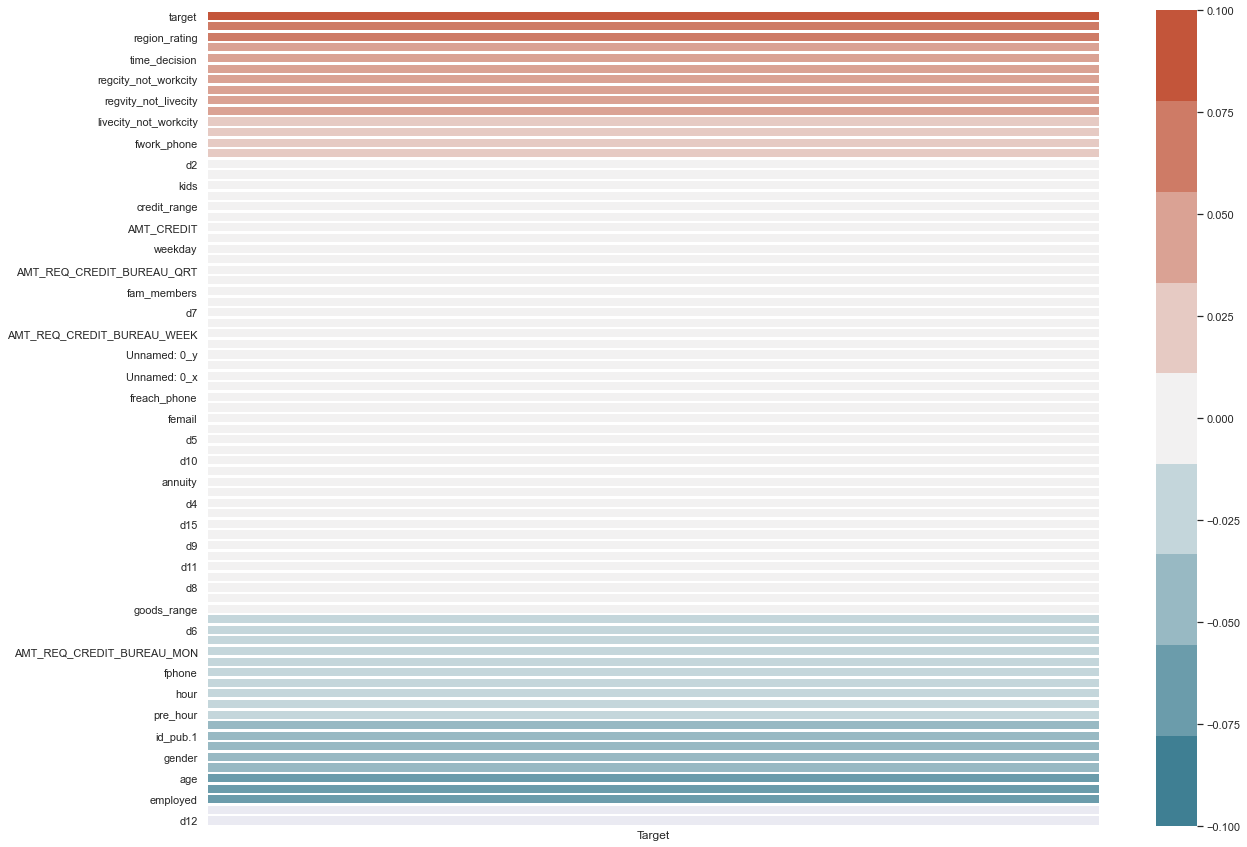

In [417]:
sns.set(font_scale=1)

num_app = app.replace(cleanup_nums)
#num_app = num_app[['target','age_range','education','income_range','credit_range','status','pop_relative','gender',\
#                  'fcar','frealty','femp_phone','fphone','femail','region_rating',\
#                   'regcity_not_workcity', 'livecity_not_workcity', 'family_status','housing','weekday','hour']]
num_app.head(10)


corr = num_app.corr()
corr = corr[['target']]
corr = round(corr,3).sort_values(by=['target'],ascending = False)


plt.figure(figsize = (20,15))

ccm = sns.diverging_palette(220, 20, n=9)
 
#yticklabels = ['Age,','Education','Income','Credit','Prev. Credit Status','Living Situation',\
#              'Gender','Empl. Phone','Phone','Email','Remote or Urban','Permantent add. not at work',\
#              'Contact add. not work','Family Status','Weekday','Hour']

ax = sns.heatmap(corr, linecolor = 'white', linewidth = 1.5,\
                 vmax = 0.1, vmin = -0.1, annot = False,\
                cmap = ccm, xticklabels=False)#, yticklabels = yticklabels)

plt.xlabel("Target") 

In [422]:
corr = corr[(corr['target'] >0.015) | (corr['target'] < -0.015)]
print(corr.shape)

(27, 1)


26

Text(0.5, 104.0, 'Target')

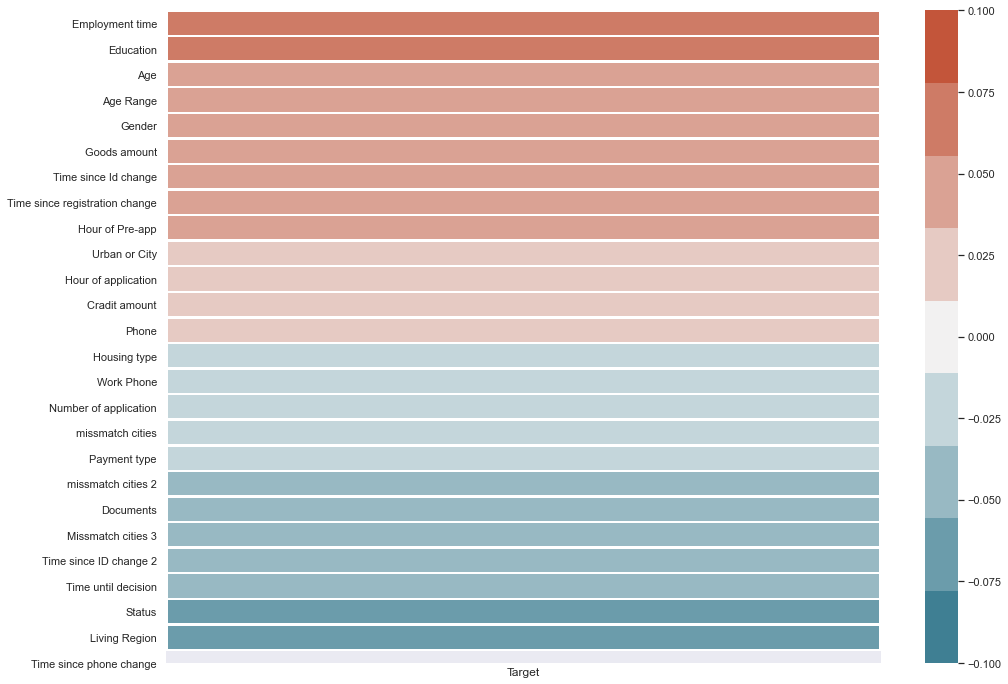

In [423]:
sns.set(font_scale=1)


#num_app = num_app[['status','time_decision','cnt_payment','target','gender', 'income_range', 'credit',\
#                   'goods_range','education','housing', 'pop_relative', 'age','employed', 'registration',\
#                   'id_pub','femp_phone','fphone','region_rating']]
                   


#corr = num_app.corr()
#corr = corr[['target']]
corr = corr.iloc[1:-1]
#corr = round(corr,3).sort_values(by=['target'],ascending = True)

plt.figure(figsize = (16,12))

#ccm = sns.diverging_palette(220, 20, n=9)
 
yticklabels = ['Employment time','Education','Age','Age Range','Gender','Goods amount',\
               'Time since Id change','Time since registration change','Hour of Pre-app',\
               'Urban or City','Hour of application','Cradit amount','Phone',\
               'Housing type','Work Phone','Number of application','missmatch cities',\
               'Payment type','missmatch cities 2','Documents','Missmatch cities 3',\
              'Time since ID change 2','Time until decision','Status','Living Region',\
              'Time since phone change']

ax = sns.heatmap(corr, linecolor = 'white', linewidth = 1.5,\
                 vmax = 0.1, vmin = -0.1, annot = False,\
                cmap = ccm, xticklabels=False, yticklabels = yticklabels)

plt.xlabel("Target") 


In [412]:
print(corr.shape)
len(yticklabels)

(25, 1)


26

## What category of clients was rejected most 

In [268]:
rej = app[app['status'] == 'Refused']
approv = app[app['status'] == 'Approved']


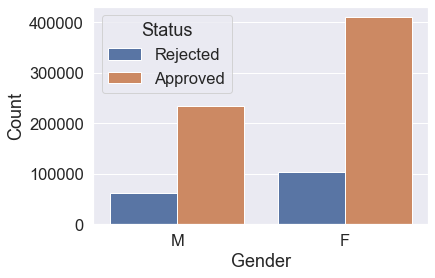

In [288]:
rej_gender = rej['gender'].value_counts()
rej_gender
#men_age_total = men['age_range'].value_counts()
#men_per = round((men_age/men_age_total)*100,2)

rej_gender = rej_gender.reset_index()
rej_gender
rej_gender.columns = ['Gender','Count']
rej_gender['Status'] = 'Rejected'

appr_gender = approv['gender'].value_counts()
appr_gender
#men_age_total = men['age_range'].value_counts()
#men_per = round((men_age/men_age_total)*100,2)

appr_gender = appr_gender.reset_index()
appr_gender
appr_gender.columns = ['Gender','Count']
appr_gender['Status'] = 'Approved'

df = rej_gender.append(appr_gender)
df


ax = sns.barplot(x = 'Gender', y = 'Count', hue = 'Status', data = df,\
                order = ['M','F'])
#                 palette = palette_gender)
#ax.set(xlabel = 'Age', ylabel ='Percent [%]', title = '% Defaults per Age group')
#ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


In [292]:
print(df)


print(women.shape)

men.shape

  Gender   Count    Status
0      F  103013  Rejected
1      M   62895  Rejected
0      F  410213  Approved
1      M  233970  Approved
(646547, 99)


(371108, 99)

F    103013
M     62895
Name: gender, dtype: int64
F    15.93
M    16.95
Name: gender, dtype: float64
F    63.45
M    63.05
Name: gender, dtype: float64


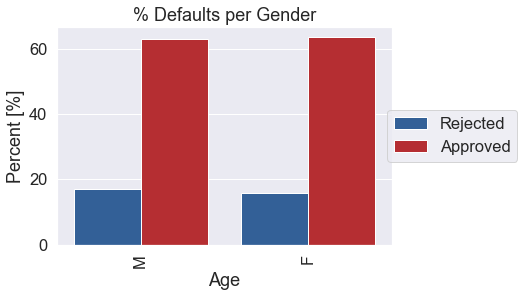

In [328]:
rej_gender = rej['gender'].value_counts()
print(rej_gender)
total_men_apps = men.shape[0]
total_women_apps = women.shape[0]

rej_gender_per[1] = round((rej_gender[1]/total_men_apps)*100,2)
rej_gender_per[0] = round((rej_gender[0]/total_women_apps)*100,2)

print(rej_gender_per)


rej_gender = rej_gender_per.reset_index()
rej_gender
rej_gender.columns = ['Gender','Percent']
rej_gender['Status'] = 'Rejected'

appr_gender = approv['gender'].value_counts()
appr_gender_per[0] = round((appr_gender[0]/total_women_apps)*100,2)
appr_gender_per[1] = round((appr_gender[1]/total_men_apps)*100,2)

print(appr_gender_per)
appr_gender = appr_gender_per.reset_index()
appr_gender
appr_gender.columns = ['Gender','Percent']
appr_gender['Status'] = 'Approved'

df = rej_gender.append(appr_gender)
df


ax = sns.barplot(x = 'Gender', y = 'Percent', hue = 'Status', data = df,\
                order = ['M','F'],\
                 palette = palette_gender)
ax.set(xlabel = 'Age', ylabel ='Percent [%]', title = '% Defaults per Gender')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
# Put a legend to the right side
ax.legend(loc='center right', bbox_to_anchor=(1.4, 0.5), ncol=1)


30-45    80134
45-60    49587
<30      31974
>60       4213
Name: age_range, dtype: int64


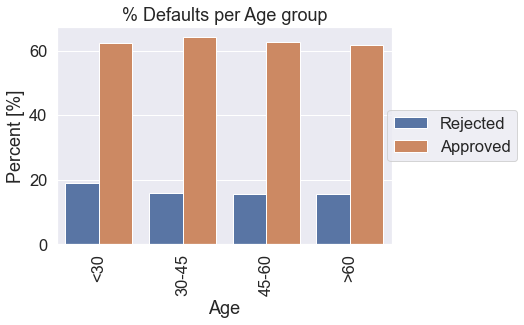

In [327]:
rej_age = rej['age_range'].value_counts()
print(rej_age)
total_age = app['age_range'].value_counts()

rej_age_per = round((rej_age/total_age)*100,2)
# print(rej_age_per)

rej_age = rej_age_per.reset_index()
rej_age.columns = ['Age','Percent']
rej_age['Status'] = 'Rejected'

appr_age = approv['age_range'].value_counts()
appr_age_per = round((appr_age/total_age)*100,2)

appr_age = appr_age_per.reset_index()
appr_age.columns = ['Age','Percent']
appr_age['Status'] = 'Approved'

df = rej_age.append(appr_age)
# df

ax = sns.barplot(x = 'Age', y = 'Percent', hue = 'Status', data = df,\
                 order = ['<30','30-45','45-60','>60'])
#                 palette = 'Spectral')
ax.set(xlabel = 'Age', ylabel ='Percent [%]', title = '% Defaults per Age group')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.legend(loc='center right', bbox_to_anchor=(1.4, 0.5), ncol=1)
